## Healthcare Test Results Classification

In [1]:
!pip install category_encoders

### Imports

In [2]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
file_path = '/content/train data.csv'

In [4]:
df = pd.read_csv(file_path)

### Studying The Dataset

In [5]:
df.describe()

,ID,Age,Billing Amount,Room Number
count,50000.000000,50000.000000,49276.000000,50000.000000
mean,25000.500000,45.863700,5397.314987,282.999980
std,14433.901067,24.416119,3240.601901,109.993534
min,1.000000,0.000000,-995.211704,50.000000
25%,12500.750000,26.000000,2645.811489,203.000000
50%,25000.500000,45.000000,5313.507889,286.000000
75%,37500.250000,65.000000,8027.205893,370.000000
max,50000.000000,100.000000,12635.764460,500.000000


In [6]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,27,Female,O-,Asthma,06/06/2022,Mark Hartman Jr.,Sons and Miller,Cigna,2625.980554,379,Elective,18/08/2022,Ibuprofen,Normal
1,2,LesLie TErRy,68,Female,O-,Cancer,19/11/2021,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,20/11/2021,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,21,Female,A+,Hypertension,05/03/2022,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,16/05/2022,Paracetamol,Normal
3,4,andrEw waTtS,91,Male,AB-,Diabetes,06/04/2020,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,26/04/2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,52,Female,A+,Diabetes,31/12/2022,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,11/02/2023,Penicillin,Abnormal


In [7]:
df.dropna(inplace=True)

In [8]:
# Value counts for categorical features
print(df['Blood Type'].value_counts())
print(df['Insurance Provider'].value_counts())
print(df['Admission Type'].value_counts())

Blood Type
B-     11641
A+      6475
O-      5495
AB-     5333
AB+     4699
O+      4294
A-      3153
B+      3077
Name: count, dtype: int64
Insurance Provider
Cigna               13613
Blue Cross          13370
Aetna               12454
Medicare             3112
UnitedHealthcare     1618
Name: count, dtype: int64
Admission Type
Urgent       22117
Emergency    11648
Elective     10402
Name: count, dtype: int64


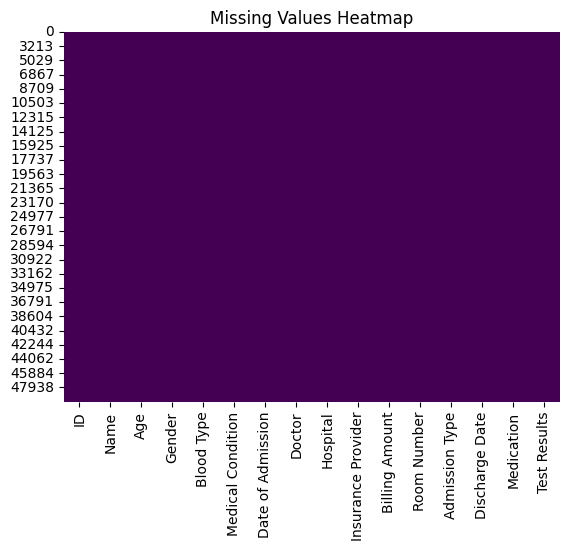

In [9]:
# Visualize missing values -> No Nulls
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
df['Name'] = df['Name'].str.title()

print(df['Name'].head())

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object


In [11]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['Gender'].nunique()

2

In [13]:
df = pd.get_dummies(df, columns=['Gender'])

In [14]:
print(df['Gender_Male'].head())

0    False
1    False
2    False
3     True
4    False
Name: Gender_Male, dtype: bool


In [15]:
df['Blood Type'].unique()

array(['O-', 'A+', 'AB-', 'B-', 'B+', 'O+', 'AB+', 'A-'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns=['Blood Type'])

In [17]:
print(df['Blood Type_A-'].head())

0    False
1    False
2    False
3    False
4    False
Name: Blood Type_A-, dtype: bool


In [18]:
df['Medical Condition'].unique()

array(['Asthma', 'Cancer', 'Hypertension', 'Diabetes', 'Obesity',
       'Arthritis'], dtype=object)

In [19]:
df = pd.get_dummies(df, columns=['Medical Condition'])

In [20]:
print(df['Medical Condition_Cancer'].head())

0    False
1     True
2    False
3    False
4    False
Name: Medical Condition_Cancer, dtype: bool


In [21]:
df['Date of Admission'].unique()

array(['06/06/2022', '19/11/2021', '05/03/2022', ..., '15/11/2022',
       '14/10/2024', '12/10/2020'], dtype=object)

In [22]:
# The correct way to check and sum null values is to call isnull() as a method first
df['Date of Admission'].isnull().sum()

np.int64(0)

In [23]:
df['Discharge Date'].isnull().sum()

np.int64(0)

In [24]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce', dayfirst=True)


In [25]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce', dayfirst=True)


In [26]:
print(df['Date of Admission'].head())

0   2022-06-06
1   2021-11-19
2   2022-03-05
3   2020-04-06
4   2022-12-31
Name: Date of Admission, dtype: datetime64[ns]


In [27]:
print(df['Discharge Date'].head())

0   2022-08-18
1   2021-11-20
2   2022-05-16
3   2020-04-26
4   2023-02-11
Name: Discharge Date, dtype: datetime64[ns]


In [28]:
df['Doctor'] = df['Doctor'].str.title()

print(df['Doctor'].head())

0    Mark Hartman Jr.
1    Angela Contreras
2          David Ruiz
3      Jenny Griffith
4       Cynthia Scott
Name: Doctor, dtype: object


In [29]:
df['Hospital'] = df['Hospital'].str.title()

print(df['Hospital'].head())

0    Sons And Miller
1        White-White
2    Group Middleton
3    Morris-Arellano
4     Williams-Davis
Name: Hospital, dtype: object


In [30]:
df['Insurance Provider'].unique()

array(['Cigna', 'Medicare', 'Blue Cross', 'UnitedHealthcare', 'Aetna'],
      dtype=object)

In [31]:
df = pd.get_dummies(df, columns=['Insurance Provider'])

In [32]:
print(df['Insurance Provider_Blue Cross'].head())

0    False
1    False
2    False
3     True
4     True
Name: Insurance Provider_Blue Cross, dtype: bool


In [33]:
df['Admission Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [34]:
df = pd.get_dummies(df, columns=['Admission Type'])

In [35]:
print(df['Admission Type_Emergency'].head())

0    False
1    False
2     True
3    False
4     True
Name: Admission Type_Emergency, dtype: bool


In [36]:
df['Medication'].unique()

array(['Ibuprofen', 'Paracetamol', 'Penicillin', 'Aspirin', 'Lipitor'],
      dtype=object)

In [37]:
df = pd.get_dummies(df, columns=['Medication'])

In [38]:
print(df['Medication_Paracetamol'].head())

0    False
1    False
2     True
3    False
4    False
Name: Medication_Paracetamol, dtype: bool


### Data Preprocessing

In [39]:
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [40]:
df['Billing_Is_Negative'] = df['Billing Amount'] < 0
df['Billing Amount'] = df['Billing Amount'].abs()

In [41]:
# Add a flag for negative values
df['Billing_Is_Negative'] = df['Billing Amount'] < 0

# Convert billing amount to positive for modeling
df['Billing Amount'] = df['Billing Amount'].abs()

In [42]:
df['Name'] = df['Name'].str.strip()
df['Name'] = df['Name'].str.replace(r'\s+', '_', regex=True)

In [43]:
df['Doctor'] = df['Doctor'].str.strip()
df['Doctor'] = df['Doctor'].str.replace(r'\s+', '_', regex=True)

In [44]:
df['Hospital'] = df['Hospital'].str.strip()
df['Hospital'] = df['Hospital'].str.replace(r'\s+', '_', regex=True)

In [45]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [46]:
test_results_map = {'Normal': 0, 'Inconclusive': 1, 'Abnormal': 2}

# Apply the mapping
df['Test Results'] = df['Test Results'].map(test_results_map)

In [47]:
print(df['Test Results'].head)

<bound method NDFrame.head of 0        0
1        1
2        0
3        2
4        2
        ..
49995    1
49996    2
49997    2
49998    2
49999    1
Name: Test Results, Length: 44167, dtype: int64>


Correlation with target 'Result':
Test Results                           1.000000
Admission Type_Urgent                  0.489779
Insurance Provider_Blue Cross          0.484385
Room Number                            0.280142
Medical Condition_Asthma               0.189785
Blood Type_AB-                         0.141448
Medical Condition_Diabetes             0.130593
Blood Type_O+                          0.101297
Blood Type_A-                          0.089489
Gender_Male                            0.086784
Blood Type_O-                          0.076433
Medication_Aspirin                     0.055480
Medication_Ibuprofen                   0.048263
Age                                    0.046025
Medication_Paracetamol                 0.028701
Insurance Provider_UnitedHealthcare    0.021660
Medication_Lipitor                     0.012421
Medical Condition_Arthritis            0.005668
Blood Type_AB+                         0.004673
ID                                    -0.004669
Medica

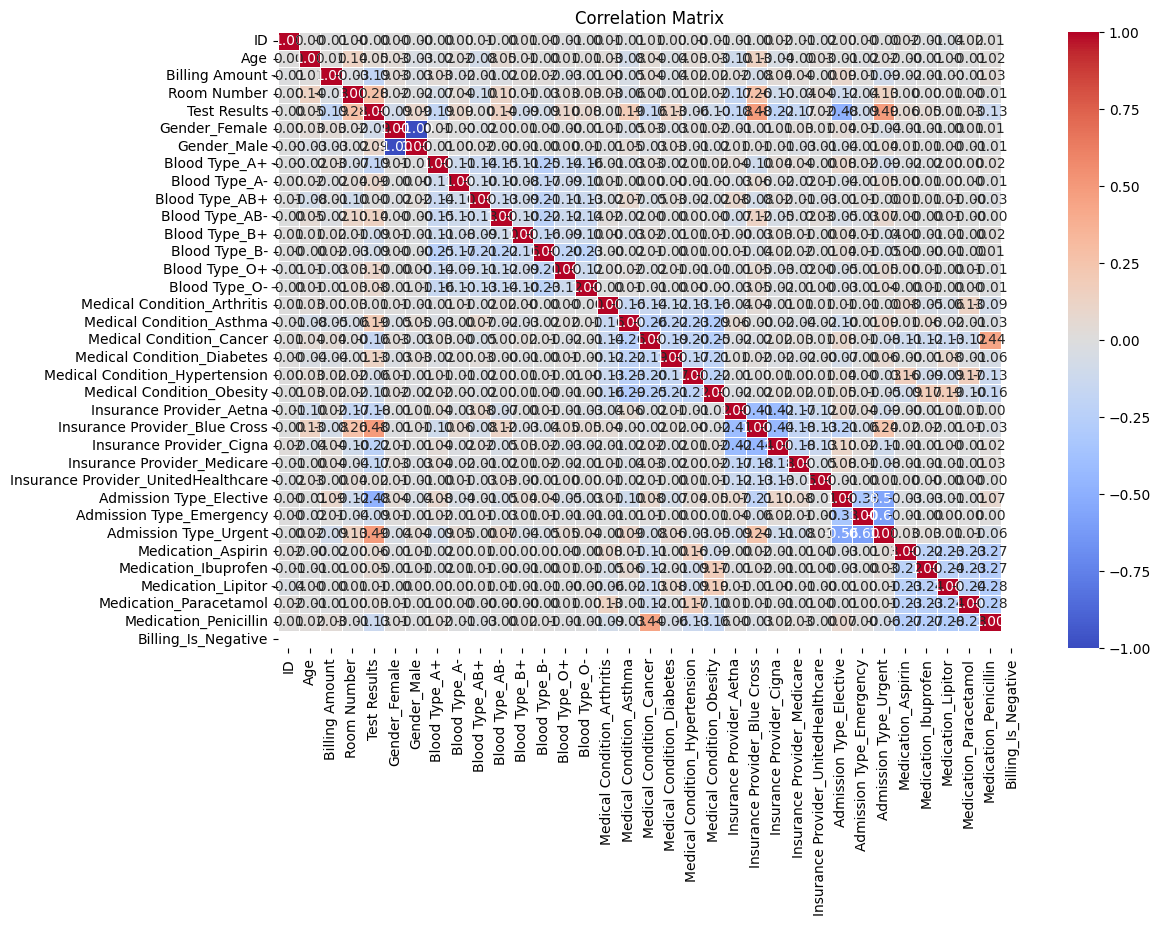

In [48]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

# Optional: Heatmap of the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Normalization

In [49]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
billing_amount_values = df['Billing Amount'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_billing_amount = scaler.fit_transform(billing_amount_values)

# Update the 'Billing Amount' column in the DataFrame
df['Billing Amount'] = normalized_billing_amount

In [50]:
print(df['Billing Amount'].head())

0    0.207798
1    0.116420
2    0.406091
3    0.710102
4    0.159484
Name: Billing Amount, dtype: float64


In [51]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [52]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
age_values = df['Age'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_age = scaler.fit_transform(age_values)

# Update the 'Billing Amount' column in the DataFrame
df['Age'] = normalized_age

In [53]:
print(df['Age'].head())

0    0.27
1    0.68
2    0.21
3    0.91
4    0.52
Name: Age, dtype: float64


In [54]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

Correlation with target 'Result':
Test Results                           1.000000
Admission Type_Urgent                  0.489779
Insurance Provider_Blue Cross          0.484385
Room Number                            0.280142
Medical Condition_Asthma               0.189785
Blood Type_AB-                         0.141448
Medical Condition_Diabetes             0.130593
Blood Type_O+                          0.101297
Blood Type_A-                          0.089489
Gender_Male                            0.086784
Blood Type_O-                          0.076433
Medication_Aspirin                     0.055480
Medication_Ibuprofen                   0.048263
Age                                    0.046025
Medication_Paracetamol                 0.028701
Insurance Provider_UnitedHealthcare    0.021660
Medication_Lipitor                     0.012421
Medical Condition_Arthritis            0.005668
Blood Type_AB+                         0.004673
ID                                    -0.004669
Medica

### Dropping Unnecessary Columns

In [55]:
df = df.drop('ID', axis=1)

In [56]:
df = df.drop('Name', axis=1)

In [57]:
df = df.drop('Room Number', axis=1)

In [58]:
df['Days Spent'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [59]:
df = df.drop('Discharge Date', axis=1)

In [60]:
df = df.drop('Date of Admission', axis=1)

In [61]:
print(df['Days Spent'].head())

0    73
1     1
2    72
3    20
4    42
Name: Days Spent, dtype: int64


### Correlation Matrix

In [62]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

Correlation with target 'Result':
Test Results                           1.000000
Admission Type_Urgent                  0.489779
Insurance Provider_Blue Cross          0.484385
Medical Condition_Asthma               0.189785
Blood Type_AB-                         0.141448
Medical Condition_Diabetes             0.130593
Blood Type_O+                          0.101297
Blood Type_A-                          0.089489
Gender_Male                            0.086784
Blood Type_O-                          0.076433
Medication_Aspirin                     0.055480
Medication_Ibuprofen                   0.048263
Age                                    0.046025
Medication_Paracetamol                 0.028701
Insurance Provider_UnitedHealthcare    0.021660
Medication_Lipitor                     0.012421
Medical Condition_Arthritis            0.005668
Blood Type_AB+                         0.004673
Medical Condition_Hypertension        -0.061435
Blood Type_B-                         -0.085127
Blood 

In [63]:
df = df.drop('Billing_Is_Negative', axis=1)

## Checking Outliers

In [64]:
Q1 = df['Days Spent'].quantile(0.25)
Q3 = df['Days Spent'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Days Spent'] < lower_bound) | (df['Days Spent'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


## MinMax Scaller

In [65]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
days_spent_values = df['Days Spent'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_days_spent = scaler.fit_transform(days_spent_values)

# Update the 'Billing Amount' column in the DataFrame
df['Days Spent'] = normalized_days_spent

In [66]:
print(df['Days Spent'].head())

0    0.732673
1    0.019802
2    0.722772
3    0.207921
4    0.425743
Name: Days Spent, dtype: float64


In [67]:
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

                Age  Billing Amount  Test Results    Days Spent
count  44167.000000    44167.000000  44167.000000  44167.000000
mean       0.458368        0.428680      0.988928      0.432907
std        0.243626        0.256557      0.817489      0.256477
min        0.000000        0.000000      0.000000      0.000000
25%        0.260000        0.209530      0.000000      0.217822
50%        0.450000        0.421566      1.000000      0.425743
75%        0.650000        0.637657      2.000000      0.633663
max        1.000000        1.000000      2.000000      1.000000


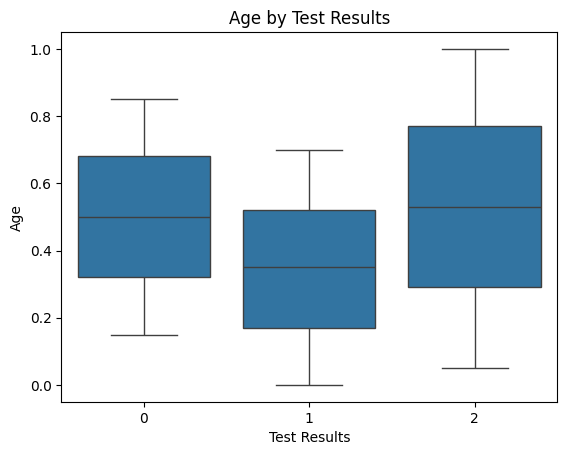

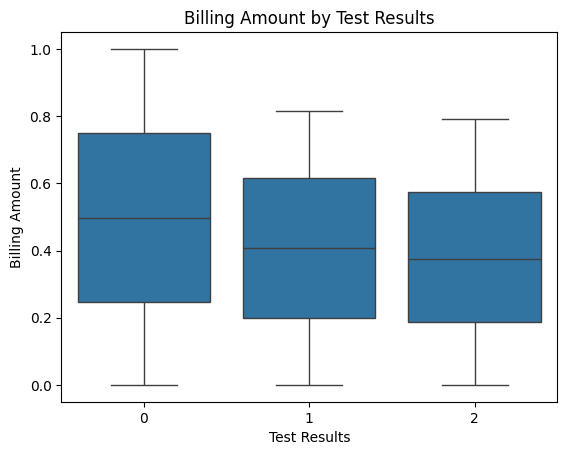

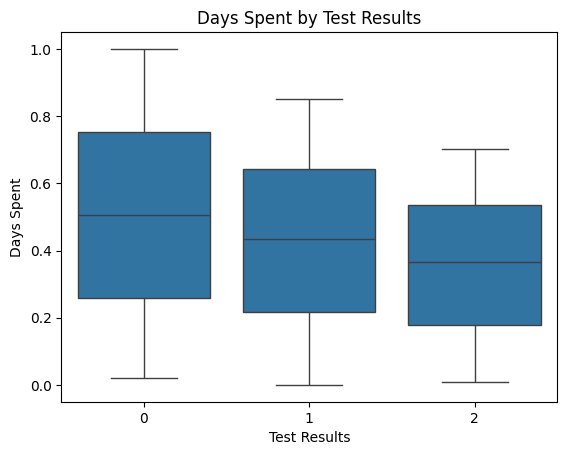

In [68]:
# Boxplots of numerical features by Test Results -> three boxplots show the 3 features not a strong predictor for target variable
sns.boxplot(x='Test Results', y='Age', data=df)
plt.title('Age by Test Results')
plt.show()

sns.boxplot(x='Test Results', y='Billing Amount', data=df)
plt.title('Billing Amount by Test Results')
plt.show()

sns.boxplot(x='Test Results', y='Days Spent', data=df)
plt.title('Days Spent by Test Results')
plt.show()

## Histogram Plotting

<Axes: xlabel='Age', ylabel='Count'>

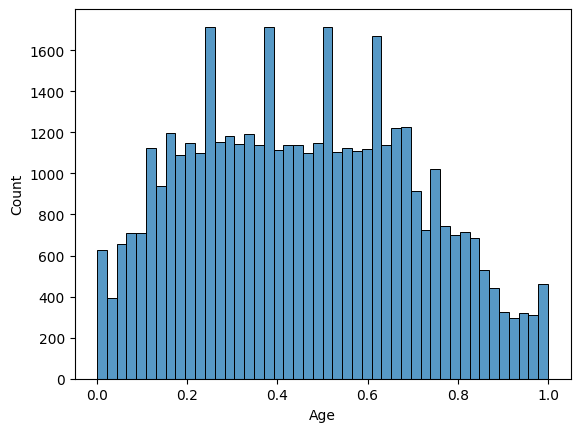

In [69]:
sns.histplot(df['Age'])

<Axes: xlabel='Billing Amount', ylabel='Count'>

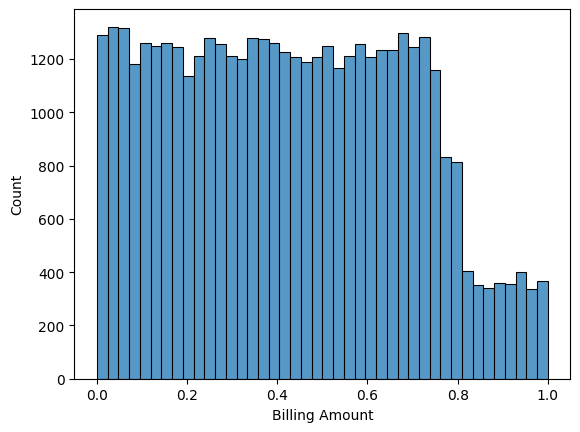

In [70]:
sns.histplot(df['Billing Amount'])

<Axes: xlabel='Days Spent', ylabel='Count'>

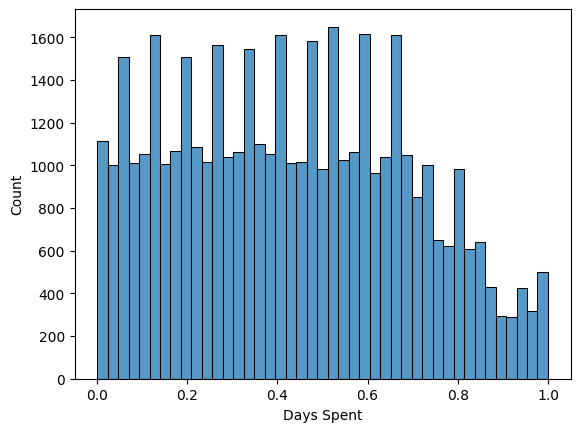

In [71]:
sns.histplot(df['Days Spent'])

## Box Plot

<Axes: ylabel='Age'>

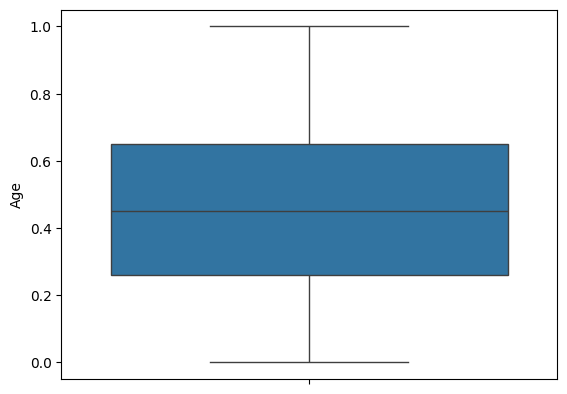

In [72]:
sns.boxplot(y=df['Age'])

<Axes: ylabel='Billing Amount'>

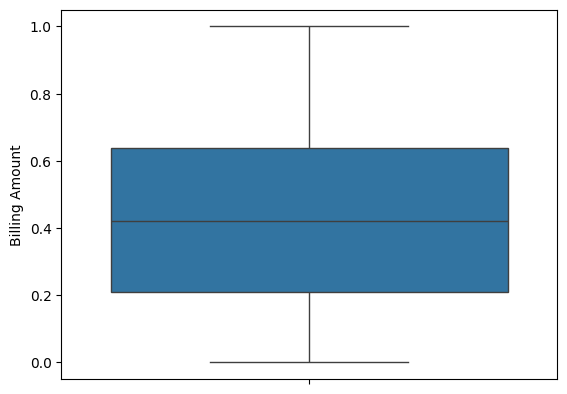

In [73]:
sns.boxplot(y=df['Billing Amount'])

<Axes: ylabel='Days Spent'>

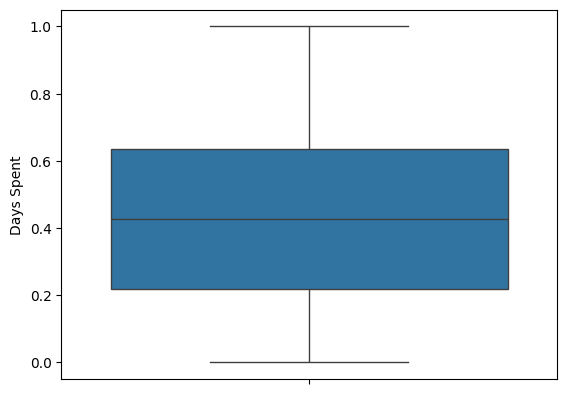

In [74]:
sns.boxplot(y=df['Days Spent'])

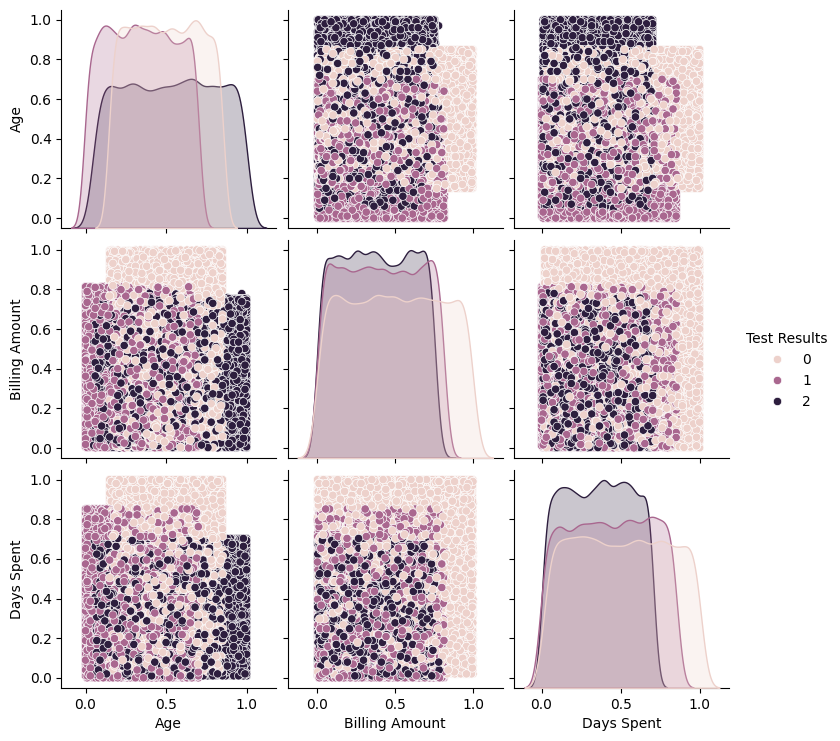

In [75]:
# Pair Plot -> Shows the relationships between all pairs of numeric features, colored by the target.
import seaborn as sns
sns.pairplot(df[['Age', 'Billing Amount', 'Days Spent', 'Test Results']], hue='Test Results')
plt.show()


Checking the relationship between the hospital and the doctors to the test dataset

In [76]:
df_test = pd.read_csv('/content/test data.csv')

In [77]:
common_doctors = df['Doctor'].isin(df_test['Doctor']).any()

In [78]:
common_doctors.shape

()

Checking for any similarities in both features

In [79]:
df = df.drop('Doctor', axis=1)

In [80]:
common_hospitals = df['Hospital'].isin(df_test['Hospital']).any()

In [81]:
common_hospitals.size

1

In [82]:
df = df.drop('Hospital', axis=1)

In [83]:
df.to_csv("Training_Set_Preprocessed_Final.csv", index=False)

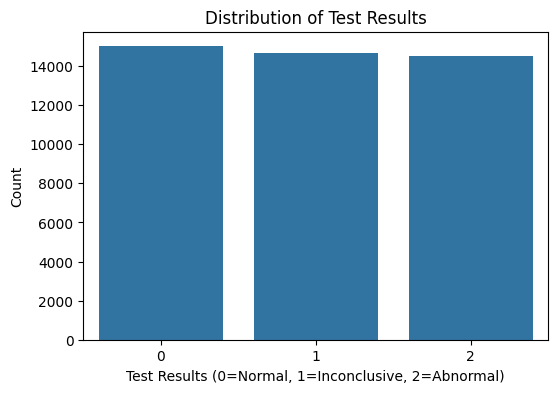

In [84]:
# Target Variable Distribution (Test Results)
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df)
plt.title("Distribution of Test Results")
plt.xlabel("Test Results (0=Normal, 1=Inconclusive, 2=Abnormal)")
plt.ylabel("Count")
plt.show()

## PCA
Adding PCA to the code and saving it into a csv file

In [85]:
# Step 1: Convert boolean to integers
df = df.copy()
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # or however many components you want
pca_result = pca.fit_transform(df)

# Step 3: Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Optional: view explained variance
print(pca.explained_variance_ratio_)

[0.18310528 0.09408101]


In [86]:
pca_df.to_csv("PCA_Training_Set_Preprocessed_Final.csv", index=False)

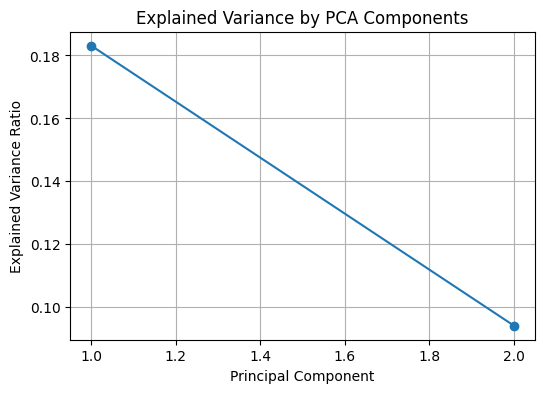

In [87]:
# shows how much variance each principal component captures

plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

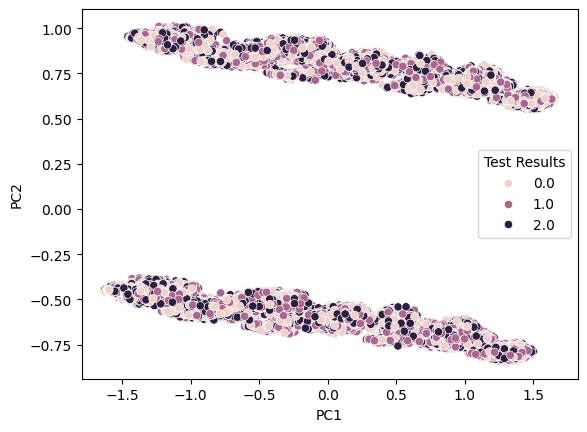

In [88]:
# PCA Scatter Plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=df['Test Results'])

## Duplicates
Checking if there is any duplicates in the dataset and dropping them

In [89]:
duplicates = df.duplicated()

In [90]:
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 44167, dtype: bool


In [91]:
df.drop_duplicates(inplace=True)

In [92]:
df.shape

(44167, 33)